In [1]:
import pandas as pd 
import quandl 

In [2]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [3]:
aapl = quandl.get('WIKI/AAPL.11', start_date = start, end_date = end) 
cisco = quandl.get('WIKI/CSCO.11', start_date = start, end_date = end) 
ibm = quandl.get('WIKI/IBM.11', start_date = start, end_date = end) 
amzn = quandl.get('WIKI/AMZN.11', start_date = start, end_date = end) 

In [5]:
aapl.head()

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183


In [6]:
aapl.iloc[0]['Adj. Close']

52.848786580038

In [7]:
for stock_df in (aapl, cisco, ibm, amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

In [8]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533


In [9]:
aapl.tail()

,Adj. Close,Normed Return
Date,,
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034
2016-12-29,115.288214,2.181473
2016-12-30,114.389454,2.164467


In [10]:
# Porfolio Allocation 
# 20% in cisco 
# 40% in amazon
# 30% in apple
#10% in ibm

In [14]:
for stock_df, allo in zip((aapl, cisco, ibm, amzn), [.3, .2, .4, .1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [16]:
aapl.tail()

,Adj. Close,Normed Return,Allocation
Date,,,
2016-12-23,115.080808,2.177549,0.653265
2016-12-27,115.811668,2.191378,0.657413
2016-12-28,115.317843,2.182034,0.654610
2016-12-29,115.288214,2.181473,0.654442
2016-12-30,114.389454,2.164467,0.649340


In [17]:
for stock_df in (aapl, cisco, ibm, amzn):
    stock_df['Position Values'] = stock_df['Allocation']*1000000

In [18]:
aapl.tail()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2016-12-23,115.080808,2.177549,0.653265,653264.617079
2016-12-27,115.811668,2.191378,0.657413,657413.396830
2016-12-28,115.317843,2.182034,0.654610,654610.167268
2016-12-29,115.288214,2.181473,0.654442,654441.973495
2016-12-30,114.389454,2.164467,0.649340,649340.095692


In [22]:
all_pos_vals = [aapl['Position Values'], cisco['Position Values'], ibm['Position Values'], amzn['Position Values']]

portfolio_val = pd.concat(all_pos_vals, axis = 1)

In [23]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166


In [24]:
portfolio_val.columns = ['AAPL Pos', 'CISCO Pos', 'IBM Pos', 'AMZN Pos']

In [26]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [28]:
portfolio_val.tail()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2016-12-23,653264.617079,377469.015679,407359.955612,424839.412389,1.862933e+06
2016-12-27,657413.396830,379323.596496,408410.671112,430877.506563,1.876025e+06
2016-12-28,654610.167268,376108.989746,406089.322915,431285.259454,1.868094e+06
2016-12-29,654441.973495,376603.544631,407091.167926,427386.471541,1.865523e+06
2016-12-30,649340.095692,373636.215323,405600.618032,418851.589119,1.847429e+06


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Total Portfolio Value')

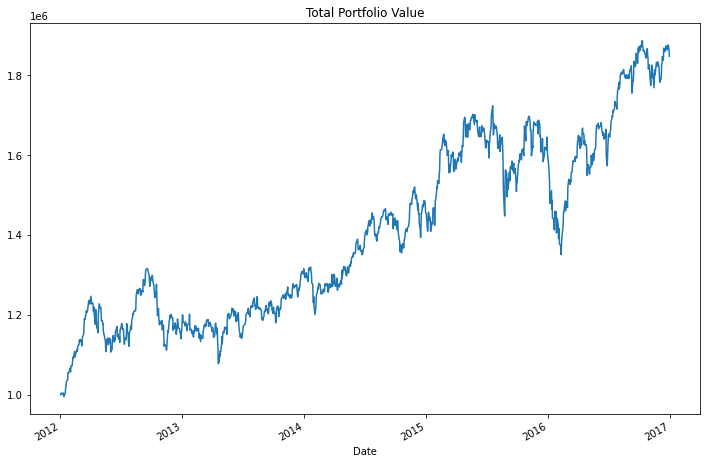

In [32]:
portfolio_val['Total Pos'].plot(figsize=(12,8))
plt.title('Total Portfolio Value')

<AxesSubplot:xlabel='Date'>

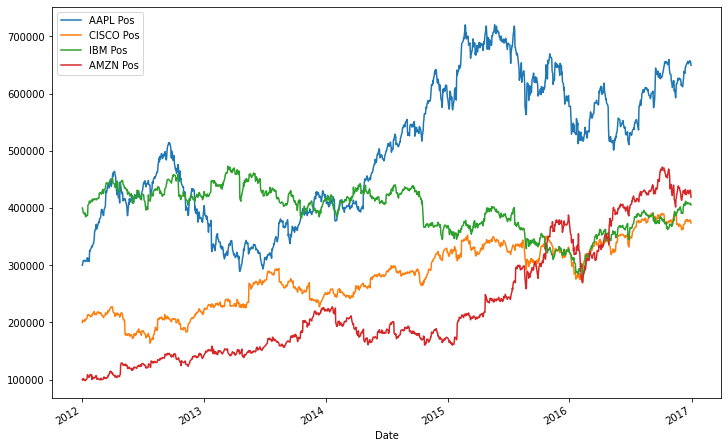

In [34]:
portfolio_val.drop('Total Pos', axis=1).plot(figsize=(12,8))

In [35]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06


In [36]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)

In [37]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos,Daily Return
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487


In [38]:
portfolio_val['Daily Return'].mean()

0.0005442330716215244

In [39]:
portfolio_val['Daily Return'].std()

0.010568287769161718

<AxesSubplot:ylabel='Frequency'>

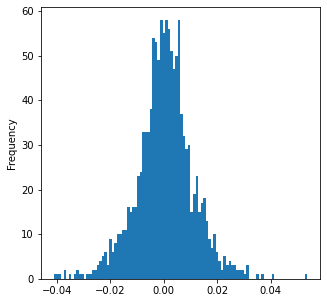

In [40]:
portfolio_val['Daily Return'].plot(kind='hist', bins=100, figsize=(5,5))

<AxesSubplot:ylabel='Density'>

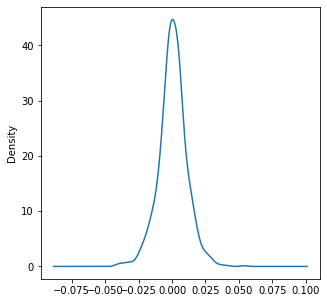

In [41]:
portfolio_val['Daily Return'].plot(kind='kde',  figsize=(5,5))

In [42]:
cumulative_return = 100 * (portfolio_val['Total Pos'][-1]/portfolio_val['Total Pos'][0]-1)

In [43]:
cumulative_return

84.74285181665545

In [44]:
SR = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()

In [45]:
SR

0.05149680662648092

In [46]:
ASR = (252**0.5) * SR

In [47]:
ASR

0.8174864618859096